In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from dataloader import load_data, visualize_images

# Load data and get train_dir
train_generator, test_generator = load_data()

# Obtain train_dir from train_generator
train_dir = train_generator.directory

# Define data augmentation parameters
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Visualize augmented images
augmented_generator = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    save_to_dir='preview',  # Save augmented images for visualization
    save_prefix='aug',
    save_format='jpeg')

# Generate and visualize augmented images
for i in range(5):  # Generate 5 augmented images
    augmented_images, _ = next(augmented_generator)


Found 202 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model

# If you have saved the baseline model
model = load_model("baseline_model.h5")

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model with augmented data
history_augmented = model.fit(
    train_datagen_augmented.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'),
    epochs=10,
    validation_data=test_generator)

Found 202 images belonging to 2 classes.
Epoch 1/10


/home/sarahesayas/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 379ms/step - accuracy: 0.6013 - loss: 0.6635 - val_accuracy: 0.8660 - val_loss: 0.4412
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.6923 - loss: 0.5920 - val_accuracy: 0.8247 - val_loss: 0.4336
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.7006 - loss: 0.5861 - val_accuracy: 0.8041 - val_loss: 0.4138
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.6439 - loss: 0.6289 - val_accuracy: 0.8299 - val_loss: 0.4237
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.6967 - loss: 0.5726 - val_accuracy: 0.8041 - val_loss: 0.4372
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.6933 - loss: 0.5493 - val_accuracy: 0.5928 - val_loss: 0.6950
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.6119 - loss: 0.7415 - val_accuracy: 0.7938 - val_loss: 0.4693
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.6866 - loss: 0.5909 - val_accuracy: 0.8299 - val_

In [5]:
model.save("augmented_model.h5")  # Save the augmented model

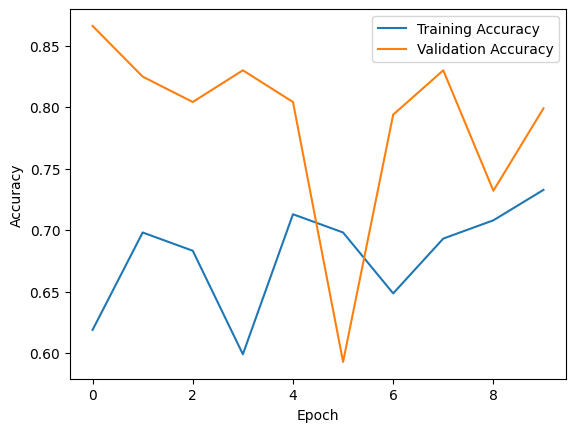

In [6]:
import matplotlib.pyplot as plt

# Learning Curves
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()